In [1]:
import numpy as np
import gym
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
env = gym.make("Taxi-v2")

In [10]:
env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [20]:
# initialize the policy with uniform distribution
policy = np.ones([env.observation_space.n,env.action_space.n],dtype=np.float) * 1/env.action_space.n

In [19]:
env.step(5)
env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)


In [130]:
def q_learning(gamename,  epsilon=1.0, episode_num=10,alpha = 0.1,gamma = 0.9):
    env = gym.make(gamename)
    MAX_STEPS = env.spec.timestep_limit
    if MAX_STEPS is None:
        MAX_STEPS = 10000
    # initialize the policy with uniform distribution
    PI = np.ones([env.observation_space.n,env.action_space.n],dtype=np.float) * 1/env.action_space.n
    Q = np.zeros([env.observation_space.n,env.action_space.n],dtype=np.float)
    V = np.zeros(env.observation_space.n,dtype=np.float)
    
    reward_history = []
    delta_history =[]
    
    for ep in range(episode_num):
        s = env.reset()
        total_reward = 0.0
        delta_q = 0.0
        for _ in range(MAX_STEPS):
            a = np.random.choice(env.action_space.n,p = PI[s])
            s_next, r, done, _ = env.step(a)
            total_reward += r
            new_Q = Q[s][a] + alpha *(r + gamma * V[s_next] - Q[s][a])
            delta_q = max(delta_q,np.fabs(new_Q - Q[s][a] ))
            Q[s][a] = new_Q
            V[s] = np.max(Q[s])
            best_a = np.argmax(Q[s])
            PI[s] = epsilon/env.action_space.n
            PI[s][best_a] = 1 - epsilon +  epsilon/env.action_space.n
            
            if done:
                V[s_next] = 0
                Q[s_next] = Q[s_next] *0.0
                break
                
            s = s_next
        
        #update epislon
        epsilon = epsilon/(1+0.001*ep)
        alpha = alpha/(1+0.001*ep)
        reward_history.append(total_reward)
        delta_history.append(delta_q)

    return reward_history,delta_history, env,PI

In [101]:
reward_history,delta_history,env,PI = q_learning("Taxi-v2",epsilon=0.99,alpha=0.2,episode_num=100)

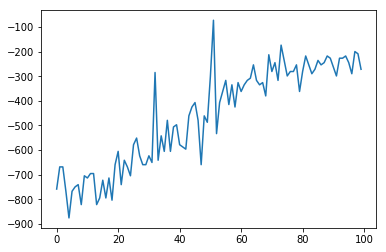

In [116]:
plt.plot(reward_history)
plt.show()

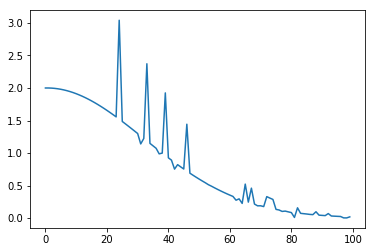

In [99]:
plt.plot(delta_history)
plt.show()

In [131]:
reward_history,delta_history,env,PI = q_learning("CliffWalking-v0",epsilon=0.99,alpha=0.2,episode_num=100)

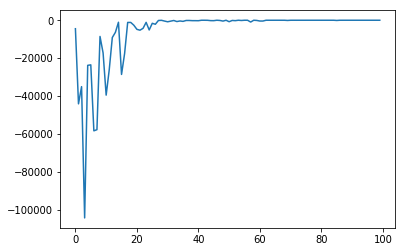

In [132]:
plt.plot(reward_history)
plt.show()

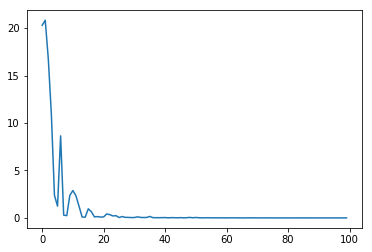

In [133]:
plt.plot(delta_history)
plt.show()

In [141]:
env = gym.make('CliffWalking-v0')
env.render()

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T



In [143]:
np.argmax(PI,axis=1).reshape(4,12)

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2],
       [1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

UP = 0
RIGHT = 1
DOWN = 2
LEFT = 3